<h1>TP2: Fourier y filtros</h1>

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


In [71]:
def create_gauss_filter(h, w, k_size, sigma):
    kernel_1d = cv.getGaussianKernel(ksize=k_size, sigma=sigma)
    gauss_filter = kernel_1d * kernel_1d.T
    padded_filter = np.zeros((h, w))
    start_x = (h - k_size) // 2
    start_y = (w - k_size) // 2
    padded_filter[start_x:start_x+k_size,
                  start_y:start_y+k_size] = gauss_filter
    return padded_filter, np.fft.fft2(padded_filter)


In [11]:
image = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)
h, w = image.shape


In [69]:
def graph_gaussian_kernel(h, w, k_size, sigma):
    kernel, kernel_tf = create_gauss_filter(h, w, k_size, sigma)
    plt.figure(figsize=(12, 12))
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.title("Kernel Gausiano")
    plt.imshow(kernel, cmap='jet')
    plt.subplot(1, 2, 2)
    plt.axis('off')
    plt.title("FFT del kernel")
    tf_shifted = np.fft.fftshift(kernel_tf)
    plt.imshow(np.abs(tf_shifted), cmap='jet')


(3, 3)


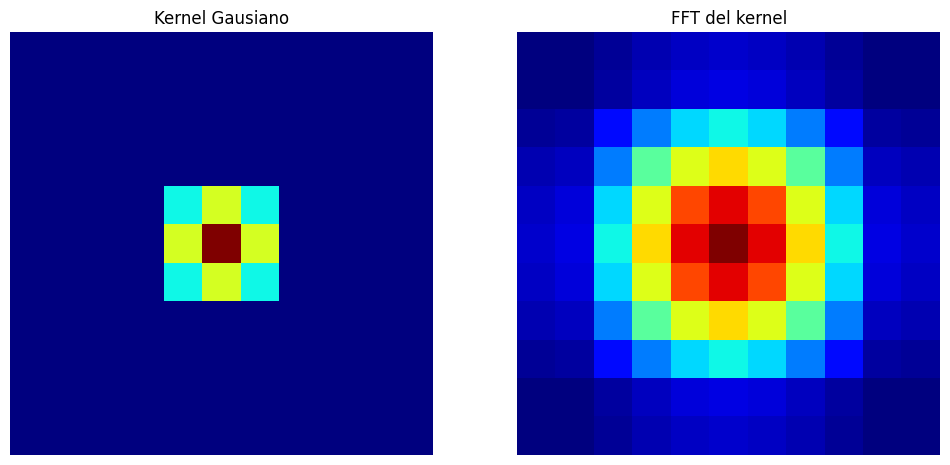

In [55]:
graph_gaussian_kernel(11, 11, 3, 1)


(3, 3)


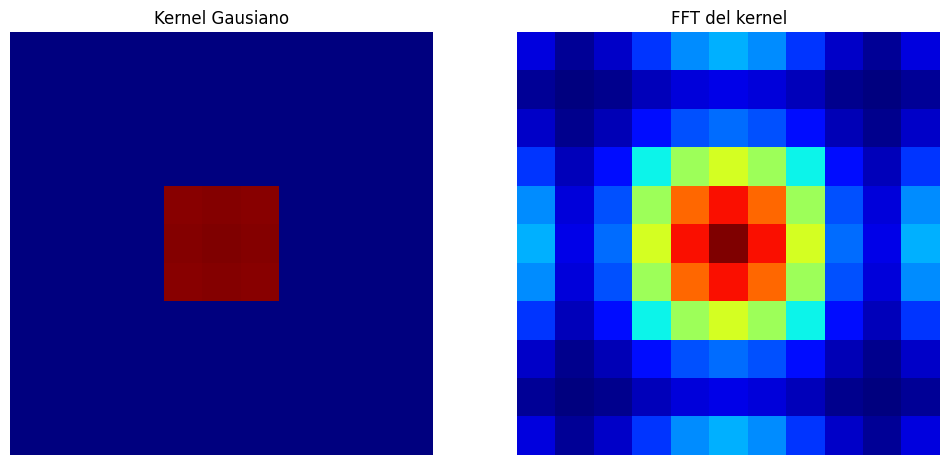

In [56]:
graph_gaussian_kernel(11, 11, 3, 10)


(15, 15)
225


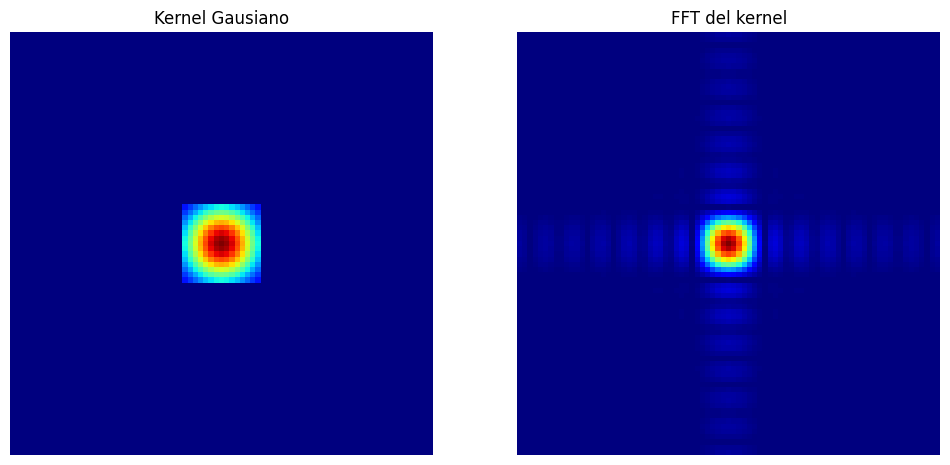

In [62]:
graph_gaussian_kernel(81, 81, 15, 5)


(35, 35)
1225


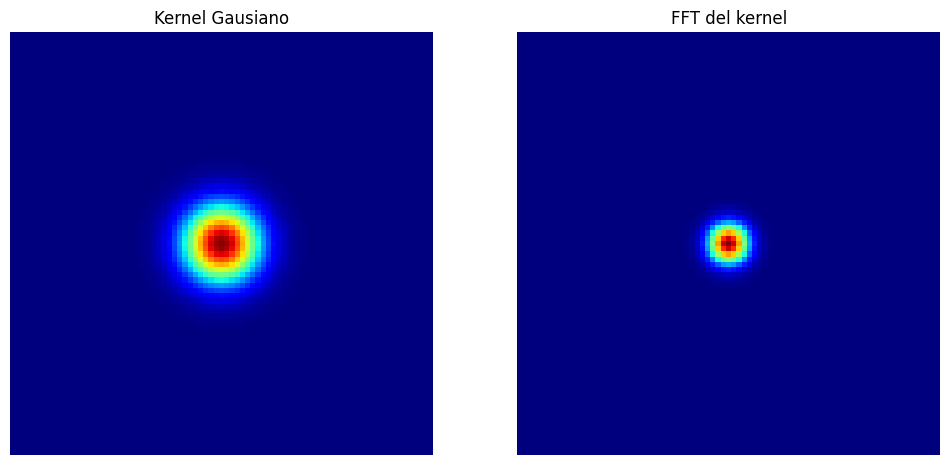

In [65]:
graph_gaussian_kernel(81, 81, 35, 5)


<h2> Una de las conclusiones que podemos sacar simplemente mirando los kernels y sus transfomraciones es que cuanto mas localizado esta el kernel en el dominio espacial, menos localizado esta en el espectral y viceversa.</h2>

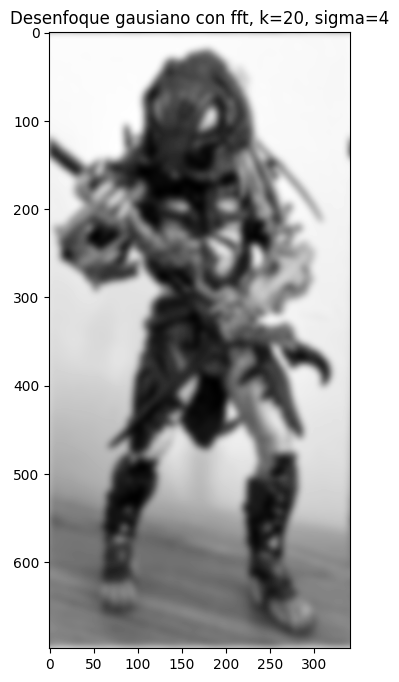

In [73]:
kernel, kernel_tf = create_gauss_filter(h, w, k_size=21, sigma=4)
img_fft = np.fft.fft2(image)
filtered = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(8, 8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano con fft, k=20, sigma=4')


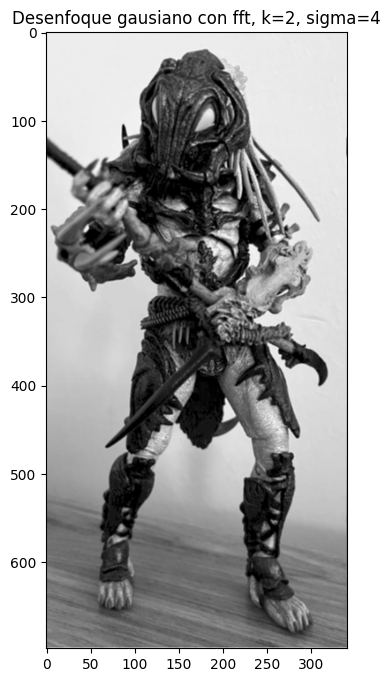

In [74]:
kernel, kernel_tf = create_gauss_filter(h, w, k_size=3, sigma=4)
img_fft = np.fft.fft2(image)
filtered = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(8, 8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano con fft, k=2, sigma=4')


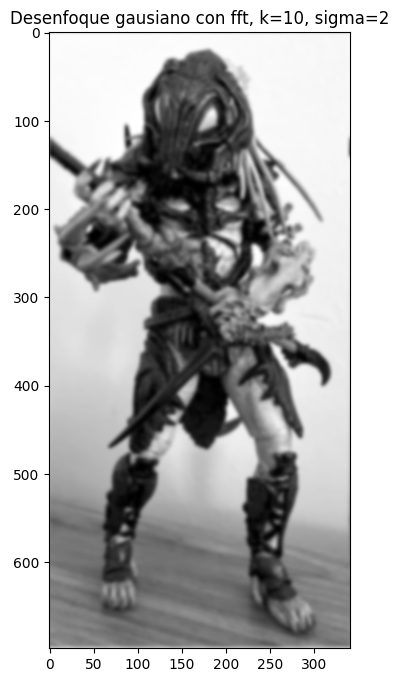

In [75]:
kernel, kernel_tf = create_gauss_filter(h, w, k_size=11, sigma=2)
img_fft = np.fft.fft2(image)
filtered = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(8, 8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano con fft, k=10, sigma=2')


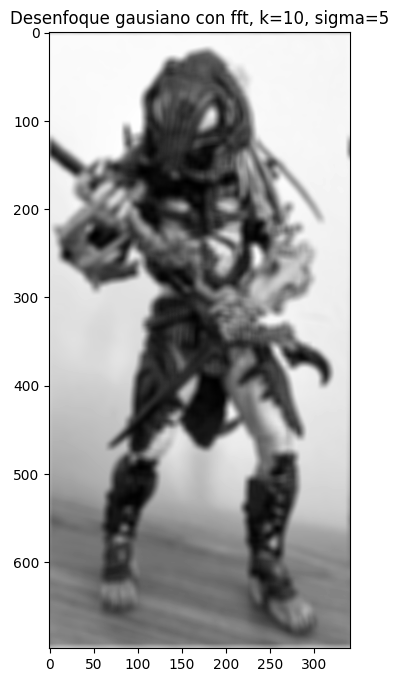

In [76]:
kernel, kernel_tf = create_gauss_filter(h, w, k_size=11, sigma=5)
img_fft = np.fft.fft2(image)
filtered = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(8, 8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano con fft, k=10, sigma=5')


<h2>Medicion de calidad en terminos de enfoque</h2>

In [84]:
def focus_quality(image):
    M, N = image.shape
    img_fft = np.fft.fft2(image)  # En el paper es F
    shifted_img = np.fft.fftshift(img_fft)  # En el paper es Fc
    absolute_image = np.abs(shifted_img)  # En el paper es AF
    image_max = absolute_image.max()  # En el paper es M
    # El paper dice que utiliza los valores de pixel de F,
    threshold = np.count_nonzero(absolute_image > image_max/1000)
    # Esto no seria posible dado que F tiene numeros complejos, entonces se usa su valor absoluto es decir la matrix AF
    return threshold/(M*N)


In [87]:
focus_quality(image)


0.0364888369787159

Text(0, 0.5, 'Calidad de enfoque')

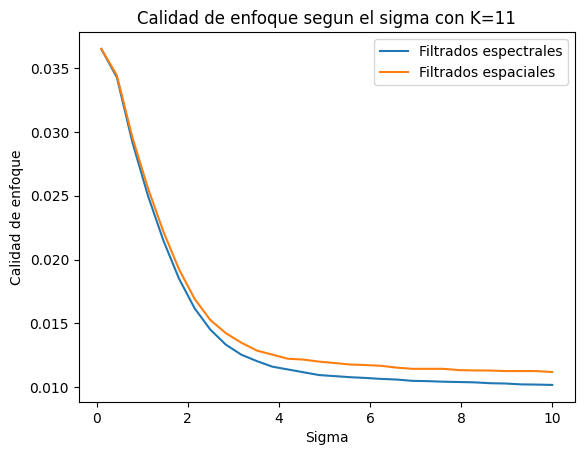

In [100]:
sigmas = np.linspace(0.1, 10, 30)
spectral_filters = []
spatial_filters = []
for sigma in sigmas:
    kernel, kernel_tf = create_gauss_filter(h, w, k_size=11, sigma=sigma)
    img_fft = np.fft.fft2(image)
    filtered = img_fft * kernel_tf
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))
    spectral_filters.append(focus_quality(img_gauss))
    spatial_filters.append(focus_quality(cv.GaussianBlur(
        image, ksize=(11, 11), sigmaX=sigma,  sigmaY=sigma)))
plt.plot(sigmas, spectral_filters, label='Filtrados espectrales')
plt.plot(sigmas, spatial_filters, label='Filtrados espaciales')
plt.legend()
plt.title('Calidad de enfoque segun el sigma con K=11')
plt.xlabel("Sigma")
plt.ylabel("Calidad de enfoque")


Text(0, 0.5, 'Calidad del enfoque')

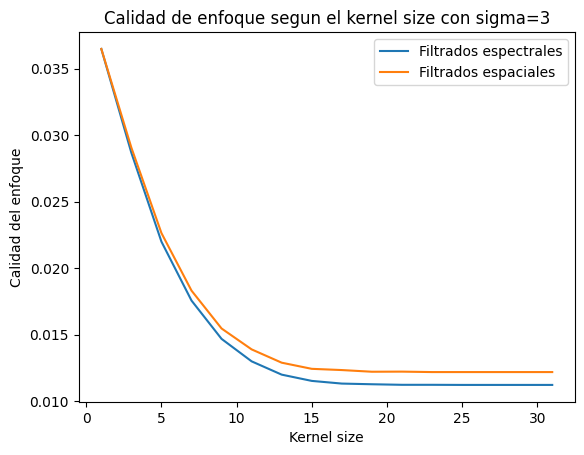

In [115]:
kSizes = np.linspace(1, 31, 31).astype('uint8')
kSizes = kSizes[kSizes % 2 > 0]  # Solo consideremos impares
spectral_filters = []
spatial_filters = []
for k in kSizes:
    kernel, kernel_tf = create_gauss_filter(h, w, k_size=k, sigma=3)
    img_fft = np.fft.fft2(image)
    filtered = img_fft * kernel_tf
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))
    spectral_filters.append(focus_quality(img_gauss))
    spatial_filters.append(focus_quality(
        cv.GaussianBlur(image, ksize=(k, k), sigmaX=3,  sigmaY=3)))
plt.plot(kSizes, spectral_filters, label='Filtrados espectrales')
plt.plot(kSizes, spatial_filters, label='Filtrados espaciales')
plt.legend()
plt.title('Calidad de enfoque segun el kernel size con sigma=3')
plt.xlabel("Kernel size")
plt.ylabel("Calidad del enfoque")


<h1> Tenengrad (GRA6) </h1>

In [110]:
def focus_quality_tenengrad(image):
    sobelx = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)
    sobely = cv.Sobel(image,cv.CV_64F,0,1,ksize=3)
    return np.sum(np.square(sobelx) + np.square(sobely))

In [111]:
focus_quality_tenengrad(image)

4467265202.0

Text(0, 0.5, 'Calidad de enfoque')

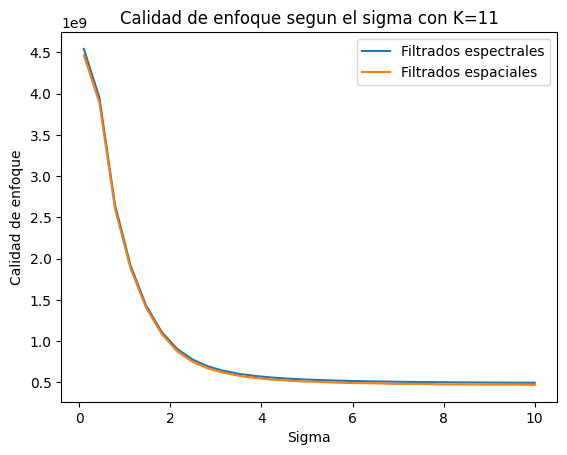

In [112]:
sigmas = np.linspace(0.1, 10, 30)
spectral_filters = []
spatial_filters = []
for sigma in sigmas:
    kernel, kernel_tf = create_gauss_filter(h, w, k_size=11, sigma=sigma)
    img_fft = np.fft.fft2(image)
    filtered = img_fft * kernel_tf
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))
    spectral_filters.append(focus_quality_tenengrad(img_gauss))
    spatial_filters.append(focus_quality_tenengrad(cv.GaussianBlur(
        image, ksize=(11, 11), sigmaX=sigma,  sigmaY=sigma)))
plt.plot(sigmas, spectral_filters, label='Filtrados espectrales')
plt.plot(sigmas, spatial_filters, label='Filtrados espaciales')
plt.legend()
plt.title('Calidad de enfoque segun el sigma con K=11')
plt.xlabel("Sigma")
plt.ylabel("Calidad de enfoque")

Text(0, 0.5, 'Calidad del enfoque')

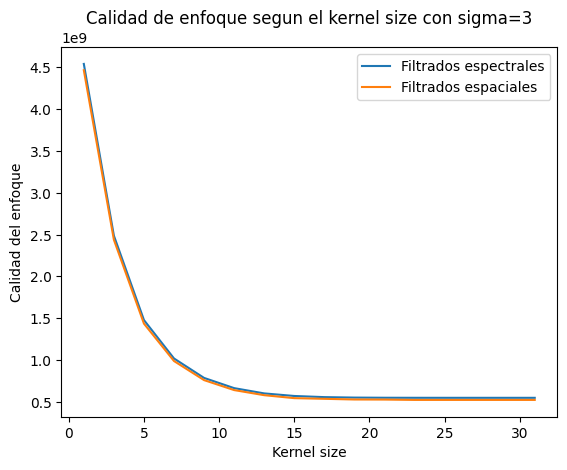

In [114]:
kSizes = np.linspace(1, 31, 31).astype('uint8')
kSizes = kSizes[kSizes % 2 > 0]  # Solo consideremos impares
spectral_filters = []
spatial_filters = []
for k in kSizes:
    kernel, kernel_tf = create_gauss_filter(h, w, k_size=k, sigma=3)
    img_fft = np.fft.fft2(image)
    filtered = img_fft * kernel_tf
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))
    spectral_filters.append(focus_quality_tenengrad(img_gauss))
    spatial_filters.append(focus_quality_tenengrad(
        cv.GaussianBlur(image, ksize=(k, k), sigmaX=3,  sigmaY=3)))
plt.plot(kSizes, spectral_filters, label='Filtrados espectrales')
plt.plot(kSizes, spatial_filters, label='Filtrados espaciales')
plt.legend()
plt.title('Calidad de enfoque segun el kernel size con sigma=3')
plt.xlabel("Kernel size")
plt.ylabel("Calidad del enfoque")